# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/miafusco/Documents/LaunchCode/data-analysis-projects2/call-center-cleanup-assignment/NorthCallCenter.csv')
df_south = pd.read_csv('/Users/miafusco/Documents/LaunchCode/data-analysis-projects2/call-center-cleanup-assignment/SouthCallCenter.csv')

# Create two new dataframes
north_call_center_df = df[['Call Purpose','Time Block','Incoming or Outgoing','Queue','Rep ID','Sale','Lost Call','Abandoned','Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time','Calls']]
south_call_center_df = df_south[['Call Purpose','Time Block','Incoming or Outgoing','Queue','Rep ID','Sale','Lost Call','Abandoned','Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time','Calls']]

print(north_call_center_df)
print(south_call_center_df)


        Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  \
0          Complaint    9:00 AM             Incoming     B   Brent   NO   
1      Sales Support   11:00 AM             Incoming     A     Cam   NO   
2      Sales Support   11:00 AM             Incoming     B    Todd   NO   
3      Sales Support    4:00 PM             Incoming     B   Brent   NO   
4    Product Support   12:00 PM             Incoming     B   Brent   NO   
..               ...        ...                  ...   ...     ...  ...   
240  Product Support    5:00 PM             Outgoing     B   Brent   NO   
241  Product Support    5:00 PM             Outgoing     A     Joe   NO   
242  Product Support    5:00 PM             Outgoing     A  Amanda   NO   
243  Product Support    5:00 PM             Outgoing     A     Cam   NO   
244  Product Support    5:00 PM             Outgoing     B  Xander   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0            0          1            

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
# EDA Question 1A solution below:
number_of_reps_North = north_call_center_df['Rep ID'].nunique()
print(number_of_reps_North)
names_of_reps_North = north_call_center_df['Rep ID'].unique()
print(names_of_reps_North)


9
['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']


#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
# EDA Question 1B solution Below:
number_of_reps_South = south_call_center_df['Rep ID'].nunique()
print(number_of_reps_South)
names_of_reps_South = south_call_center_df['Rep ID'].unique()
print(names_of_reps_South)

11
['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
# EDA Question 2A solution Below:
average_busy_minutes_North = north_call_center_df['Busy Minutes'].mean()
average_notready_minutes_North = north_call_center_df['Not Ready Minutes'].mean()
average_incoming_wait_time_North = north_call_center_df['Incoming Wait Time'].mean()
average_during_call_wait_time_North = north_call_center_df['During Call Wait Time'].mean()

print(average_busy_minutes_North)
print(average_notready_minutes_North)
print(average_incoming_wait_time_North)
print(average_during_call_wait_time_North)


9.987755102040817
1.9142857142857144
3.048780487804878
2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
# EDA Question 2B solution Below:
average_busy_minutes_South = south_call_center_df['Busy Minutes'].mean()
average_notready_minutes_South = south_call_center_df['Not Ready Minutes'].mean()
average_incoming_wait_time_South = south_call_center_df['Incoming Wait Time'].mean()
average_during_call_wait_time_South = south_call_center_df['During Call Wait Time'].mean()

print(average_busy_minutes_South)
print(average_notready_minutes_South)
print(average_incoming_wait_time_South)
print(average_during_call_wait_time_South)

10.054140127388536
1.910828025477707
3.0
3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# EDA Question 3 solution Below:
number_of_calls_North = north_call_center_df.groupby('Time Block')['Calls'].sum()
print(number_of_calls_North)

number_of_calls_South = south_call_center_df.groupby('Time Block')['Calls'].sum()
print(number_of_calls_South)

total_calls = number_of_calls_North + number_of_calls_South
print(total_calls)


Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [8]:
# Question 1 solution below
missing_values_north =north_call_center_df.isna()
print(missing_values_north)

missing_values_south =south_call_center_df.isna()
print(missing_values_south)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


     Call Purpose  Time Block  Incoming or Outgoing  Queue  Rep ID   Sale  \
0           False       False                 False  False   False  False   
1           False       False                 False  False   False  False   
2           False       False                 False  False   False  False   
3           False       False                 False  False   False  False   
4           False       False                 False  False   False  False   
..            ...         ...                   ...    ...     ...    ...   
240         False       False                 False  False   False  False   
241         False       False                 False  False   False  False   
242         False       False                 False  False   False  False   
243         False       False                 False  False   False  False   
244         False       False                 False  False   False  False   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0        Fals

#### Record your answer below:

> Your Answer: It looks like there is missing data in the "Incoming Wait Time" column. I think I would work to determine a value for that column. Maybe that means trying to locate the data or maybe I would use an average of the incoming wait time as the value. Our business issue is trying to determine if the company needs to hire five additional reps and I think knowing how long callers are waiting would be an important factor for that decision. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [9]:
# Cleaning Question 2 solution below:
df["Sale"] = df["Sale"].replace({"yes": "Yes", "Yes": "Yes"})
print(df["Sale"])

inconsistent_data = north_call_center_df['Sale'].unique()
print(inconsistent_data)

df["Sale"] = df["Sale"].str.strip()

inconsistent_data = north_call_center_df['Sale'].unique()
print(inconsistent_data)

print(df["Sale"])

0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object
['NO' 'YES ' 'YES']
['NO' 'YES ' 'YES']
0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object


##### Record your answer by below:
> Your Answer: There is a "Yes" and a "Yes  " (with a space). Shruti shared how to fix the trailing space. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [10]:
# Cleaning Question 3 solution below:
duplicates_north = north_call_center_df.duplicated()
duplicates_south = south_call_center_df.duplicated()

print(duplicates_north)
print(duplicates_south)

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool


##### Record your answer below:
> Your Answer: There does not appear to be any duplicates. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [17]:
# Cleaning Question 4 solution below:
 

##### Record your answer below:
> Your Answer: I don't feel any of the data is unnecessary for our purposes. It depends what your business issue and guiding questions are but for what we are doing, I think all of the data is helpful. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [12]:
# Create dataframe for the entire company named df
north_call_center_df.loc[:, 'Branch'] = 'North'
south_call_center_df.loc[:, 'Branch'] = 'South'

company_df = pd.concat([north_call_center_df, south_call_center_df], ignore_index = True)
print(company_df)
#I chose to concat the two dataframes into one. This will stack the data from the individual dataframes. I also added a column so that I could still identify individual branches which is necessary for future questions. 

print(company_df.head(10))

names_of_reps_company = company_df['Rep ID'].unique()
print(names_of_reps_company)

names_of_reps_company2 = company_df['Rep ID'].nunique()
print(names_of_reps_company2)
#I pulled the head and Rep IDs to confirm that the dataframes were concatenated and the "Branch" column was added.  


        Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  \
0          Complaint    9:00 AM             Incoming     B   Brent   NO   
1      Sales Support   11:00 AM             Incoming     A     Cam   NO   
2      Sales Support   11:00 AM             Incoming     B    Todd   NO   
3      Sales Support    4:00 PM             Incoming     B   Brent   NO   
4    Product Support   12:00 PM             Incoming     B   Brent   NO   
..               ...        ...                  ...   ...     ...  ...   
554  Product Support    5:00 PM             Outgoing     D   Helga   NO   
555  Product Support    5:00 PM             Outgoing     C   Susan   NO   
556  Product Support    5:00 PM             Outgoing     C   Sandy   NO   
557  Product Support    5:00 PM             Outgoing     C    Eric   NO   
558  Product Support    5:00 PM             Outgoing     D  George   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0            0          1            

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [13]:
# Manipulation Question solution below:
Rep_ID_Sums = company_df.groupby('Rep ID')['Calls'].sum()
Rep_ID_Sums_Sorted = Rep_ID_Sums.sort_values(ascending= False)
print(Rep_ID_Sums_Sorted)
#I'm grouping by Rep ID and summing their calls. This will tell me the total number of calls for each rep allowing me to find the rep with the highest total calls in each branch. 

Rep ID
Brent     37
Eric      35
Randy     33
Sandy     32
Helga     31
Lilly     30
Todd      29
Duke      29
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Joe       26
Sharon    25
Xander    24
Cam       24
Amanda    23
Andy      23
Alice     20
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent-37
- South Branch = Eric-35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [14]:
# Manipulation Question 2 solution below:
average_call_abandonment_branch = company_df.groupby('Branch')['Abandoned'].mean() * 100
print(average_call_abandonment_branch)
#I am grouping by branch and averaging the abandoned calls. I am multipying by 100 to determine the percentage. 

average_call_abandonment_company = company_df['Abandoned'].mean() * 100
print(average_call_abandonment_company)
#I am finding the average abandoned calls for the entire company. Again, multiplying by 100 to determine percentage. 

Branch
North    2.857143
South    1.273885
Name: Abandoned, dtype: float64
1.9677996422182469


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No. 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [15]:
# Manipulation Question 3 solution below:
wait_time = company_df[company_df['Incoming Wait Time'] <=2].shape[0]
print(wait_time)

wait_time_branch = company_df[company_df['Incoming Wait Time'] <=2].groupby('Branch').size()
print(wait_time_branch)

total_incoming_wait_time_branch = company_df.groupby('Branch')['Incoming Wait Time'].count()
print(total_incoming_wait_time_branch)

total_incoming_wait_time = company_df['Incoming Wait Time'].shape[0]
print(total_incoming_wait_time)

percentage_branch = (wait_time_branch/total_incoming_wait_time_branch) *100
print(percentage_branch)

percentage_total = (wait_time / total_incoming_wait_time) *100
print(percentage_total)

81
Branch
North    33
South    48
dtype: int64
Branch
North     82
South    126
Name: Incoming Wait Time, dtype: int64
559
Branch
North    40.243902
South    38.095238
dtype: float64
14.490161001788909


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 calls, 40.24%
- South Branch = 48 calls, 38.10%
- Company Wide = 81 calls, 14.50%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [16]:
# Manipulation Question 4 solution below:
average_wait_time = company_df.groupby('Branch')['Incoming Wait Time'].mean() 
print(average_wait_time)

average_wait_time_company = company_df['Incoming Wait Time'].mean()
print(average_wait_time_company)




Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64
3.019230769230769


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

{'A': np.float64(4.166666666666666), 'B': np.float64(2.013422818791946), 'C': np.float64(0.7246376811594203), 'D': np.float64(1.7045454545454544)}


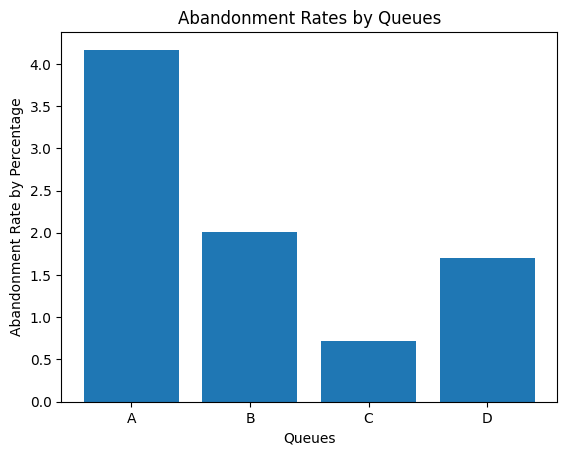

In [17]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = company_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"].iloc[i] / queue_dict["Calls"].iloc[i] *100
print(abandonment_rates)

#Your code below:
import matplotlib.pyplot as plt
plt.bar(abandonment_rates.keys(), abandonment_rates.values())

plt.title('Abandonment Rates by Queues')
plt.xlabel('Queues')
plt.ylabel('Abandonment Rate by Percentage')

plt.show()




##### Record your answer below:

> Chart style you chose and why: I chose a bar chart because it is the easiest way to compare the rates. There are only four queues so the bar chart is clear, concise, and easy to read. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [18]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_call_center_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
south_plt = south_call_center_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_call_center_df[north_call_center_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats_sorted = quick_stats.sort_values(by='Calls', ascending=False)
print(quick_stats_sorted)

quick_calls2 = south_call_center_df[south_call_center_df["Incoming Wait Time"] <= 2.0]
quick_reps2 = quick_calls2[["Rep ID", "Calls"]]
quick_stats2 = quick_reps2.groupby(["Rep ID"]).sum()  # Final Table
quick_stats2_sorted = quick_stats2.sort_values(by='Calls', ascending=False)
print(quick_stats2_sorted)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_call_center_df[north_call_center_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table 
total_stats_sorted = total_stats.sort_values(by='Calls', ascending=False)
print(total_stats_sorted)

total_calls_in2 = south_call_center_df[south_call_center_df["Incoming or Outgoing"] == "Incoming"]
rep_calls2 = total_calls_in2[["Rep ID", "Calls"]]     
total_stats2 = rep_calls2.groupby(["Rep ID"]).sum() # Final Table 
total_stats2_sorted = total_stats2.sort_values(by='Calls', ascending=False)
print(total_stats2_sorted)

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
print(service_level)

service_level2 = pd.merge(quick_stats2, total_stats2, on="Rep ID")
print(service_level2)

# Create Percentage Column in Table 3
service_level["Service Level %"] = (service_level["Calls_x"]/service_level["Calls_y"]) * 100
service_level_sorted = service_level.sort_values(by='Service Level %', ascending=False)
print(service_level_sorted)

service_level2 ["Service Level2 %"] = (service_level2["Calls_x"]/service_level2["Calls_y"]) * 100
service_level2_sorted = service_level2.sort_values(by = 'Service Level2 %', ascending =False)
print(service_level2_sorted)


        Calls
Rep ID       
Brent       6
Duke        6
Cam         5
Lilly       4
Amanda      3
Andy        3
Joe         2
Todd        2
Xander      2
        Calls
Rep ID       
Eric       10
Randy       7
Sandy       7
Susan       5
George      4
Alice       3
Helga       3
Karl        3
Kate        3
Josh        2
Sharon      1
        Calls
Rep ID       
Duke       14
Lilly      12
Cam        11
Andy       10
Joe        10
Brent       8
Todd        6
Xander      6
Amanda      5
        Calls
Rep ID       
Eric       18
Randy      16
George     13
Sandy      13
Susan      12
Helga      11
Kate       11
Josh        9
Karl        9
Sharon      8
Alice       6
        Calls_x  Calls_y
Rep ID                  
Amanda        3        5
Andy          3       10
Brent         6        8
Cam           5       11
Duke          6       14
Joe           2       10
Lilly         4       12
Todd          2        6
Xander        2        6
        Calls_x  Calls_y
Rep ID                  
Ali

Text(0, 0.5, 'Total Calls')

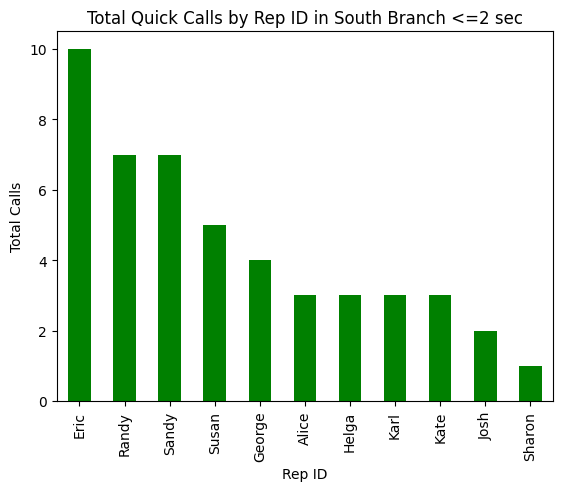

In [19]:
#Total Quick Calls in the South Branch by Rep ID answered within 2 seconds
quick_stats2_sorted['Calls'].plot(kind='bar',color='green')
plt.title('Total Quick Calls by Rep ID in South Branch <=2 sec')
plt.xlabel('Rep ID')
plt.ylabel('Total Calls')

Text(0, 0.5, 'Total Calls')

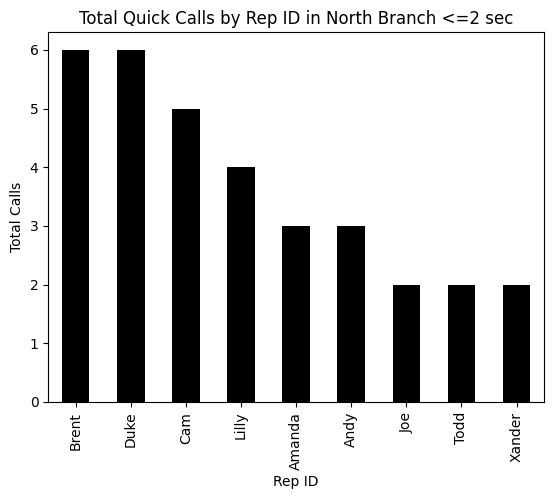

In [20]:
#Total Quick Calls in the North Branch by Rep ID answered within 2 seconds
quick_stats_sorted['Calls'].plot(kind='bar',color='black')
plt.title('Total Quick Calls by Rep ID in North Branch <=2 sec')
plt.xlabel('Rep ID')
plt.ylabel('Total Calls')

Text(0, 0.5, 'Total Calls')

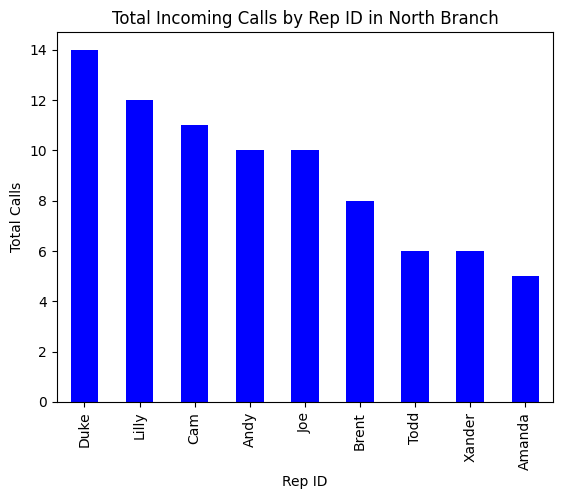

In [21]:
#Total Incoming Calls in the North Branch by Rep ID 
total_stats_sorted['Calls'].plot(kind='bar',color='Blue')
plt.title('Total Incoming Calls by Rep ID in North Branch')
plt.xlabel('Rep ID')
plt.ylabel('Total Calls')

Text(0, 0.5, 'Total Calls')

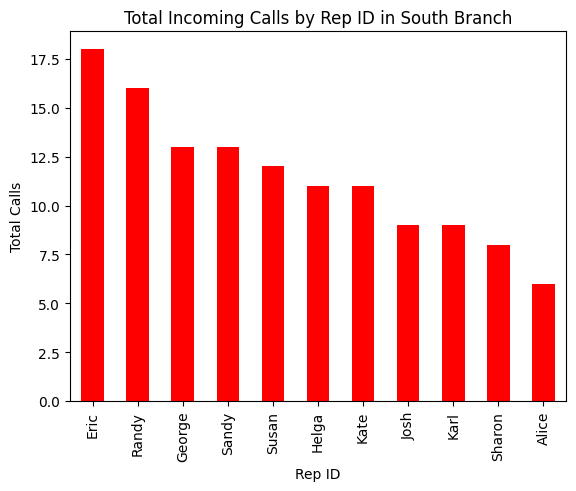

In [22]:
#Total Incoming Calls in the South Branch by Rep ID 
total_stats2_sorted['Calls'].plot(kind='bar',color='Red')
plt.title('Total Incoming Calls by Rep ID in South Branch')
plt.xlabel('Rep ID')
plt.ylabel('Total Calls')

Text(0, 0.5, 'Service Level %')

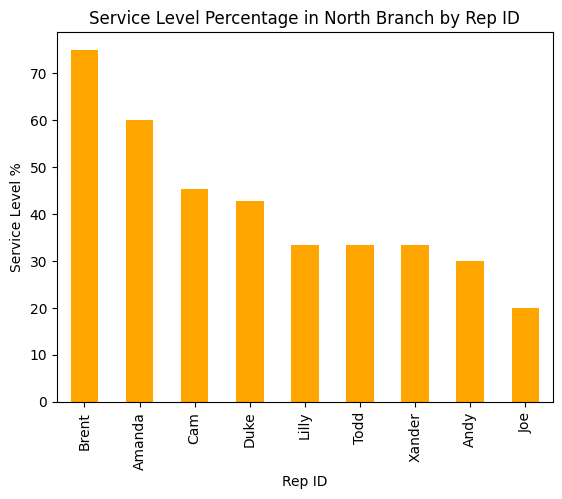

In [23]:
#Service Level Percentage in the North Branch by Rep ID 
service_level_sorted['Service Level %'].plot(kind='bar',color='Orange')
plt.title('Service Level Percentage in North Branch by Rep ID')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')

Text(0, 0.5, 'Service Level %')

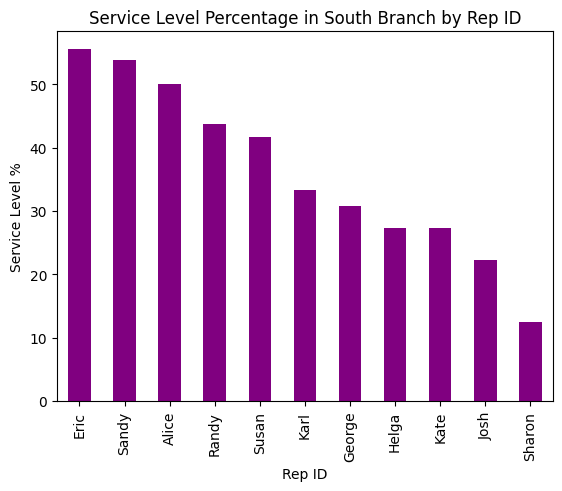

In [24]:
#Service Level Percentage in the South Branch by Rep ID 
service_level2_sorted['Service Level2 %'].plot(kind='bar',color='Purple')
plt.title('Service Level Percentage in South Branch by Rep ID')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')

##### Record your answer below:

> Chart style you chose and why: I chose bar charts. I felt bar charts were the simplest and cleanest way to compare individual reps. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 15
Product Support  Outgoing                111
                 Incoming                 34
Sales Support    Outgoing                 52
                 Incoming                 33
Name: count, dtype: int64


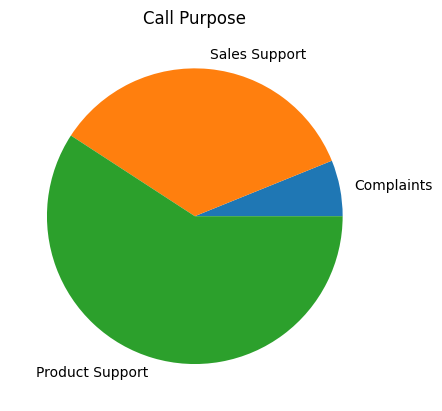

In [27]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

complaints_count = purpose_counts['Complaint'].sum()
sales_support_count = purpose_counts['Sales Support'].sum()
product_support_count = purpose_counts['Product Support'].sum()

labels = ['Complaints', 'Sales Support', 'Product Support']
sizes = [complaints_count, sales_support_count, product_support_count]

plt.pie(sizes, labels=labels)
plt.title('Call Purpose')

plt.show()





##### Record your answer below:

> Chart style you chose and why: I chose a pie chart. I felt that a pie chart was an easy way to compare the amount of calls that fell within each purpose. There were only three categories so it's a very organized pie chart. I know pie charts can look more disorganized and chaotic as there are more slices of the pie. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: I would actually say the North Branch is operating more efficiently. They have fewer reps and maintain equal or very close numbers to the South Branch. North Branch has higher abandonment rates, which would be an area of improvement. The North Branch had lower Busy Minutes, equal Not Ready Minutes, and lower During Call Wait Time. The North Branch had the rep with the highest number of calls despite being the smaller branch. North Branch also had a higher percentage of calls answered within the desired 2 second time frame. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: This is a difficult question, because I feel the North Branch is working more efficiently but they already have 2 less reps. In theory, the rep would go to the South Branch, but I don't think the number of reps is the issue. I think the South Branch needs to address ways in which they could improve with their current 11 reps and the additional rep should go to the North Branch. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I guess I would like to know how long calls last or if the company has a desired call length time. I would also like to know if the branches field the same issues or if they handle different call reasons. Maybe also how many reps are staffed on a given day/time and if they have more staff during their busy hours. There might be times where more calls come in (likely before or after people work or during lunchtime). 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [56]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: